A useful thing to do with high dimensional data is to represent it first in a subspace that is convenient for a human. It will allow one to build its intuition of the dataset based on 2D or 3D representation of this dataset.

In [7]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

INPUT_DIRECTORY = os.path.join("..", "input")
ARCHIVE_BASENAME = "multimodhandgestrec"
ARCHIVE_SUBDIRECTORY = "MultiModHandGestRec"
DATASET_DIRECTORY = os.path.join(INPUT_DIRECTORY, ARCHIVE_BASENAME, ARCHIVE_SUBDIRECTORY)

os.listdir(DATASET_DIRECTORY)

['skeletal', 'near-infrared']

The dataset is constituted by:
* **near-infrared** images of hand poses and gestures captured by the LeapMotion sensor (a pair of camera)
* **skeletal** higher level informations (skeletal) about fingers and hands extracted by LeapMotion vision algorithms

Near infrared images constitutes a high dimensional dataset and require sharp and state of the art computer vision algorithms in order to extract high level information about hand pose and gesture. LeapMotion did a great job on it and for the sake of simplicity, we propose to focus on skeletal data first.

In [ ]:
from xml.etree import ElementTree

SKELETAL_DIRECTORY = os.path.join(DATASET_DIRECTORY, "skeletal")

# dataset archive traversal while growing a dataset structured as a structure of array
for subject in os.listdir(SKELETAL_DIRECTORY):
    subject_directory = os.path.join(SKELETAL_DIRECTORY, subject)
    for dataset in os.listdir(subject_directory):
        dataset_directory = os.path.join(subject_directory, dataset)
        for gesture in os.listdir(dataset_directory):
            gesture_directory = os.path.join(dataset_directory, gesture)
            for entry in os.listdir(gesture_directory):
                # test if entry is a directory
                if (os.path.isdir(entry)):
                    # it is a test_gesture and subdirectories are related to multiple samples
                    sample_directory = os.path.join(gesture_directory, entry)
                   # if (strcmp(dataset, "test_gesture")
                     #   raise ValueError(sample_directory . " must be located in test_gesture directory")
                else:
                    # it is a file
                    print(os.path.join(gesture_directory, frame_filename))
                    print("modif pour voir")
              #  tree = ElementTree.parse(os.path.join(gesture_directory, frame_filename))
               # root = tree.getroot()
                




In [31]:
# import IMAGES in a dataframe
result = [os.path.join(dp, f) for dp, dn, filenames in os.walk('../input/multimodhandgestrec/MultiModHandGestRec/near-infrared') for f in filenames]
data_img = pd.DataFrame({"img_path": result}) # import list in a dataframe

def extract_from_path(p, n): 
    return p.split('/')[n]

# constitute fields from name extraction in paths
data_img["subject"] = data_img["img_path"].apply(extract_from_path, args=(5,))
data_img["serie"] = data_img["img_path"].apply(extract_from_path, args=(6,))
data_img["gesture"] = data_img["img_path"].apply(extract_from_path, args=(7,))
data_img["fname"] = data_img["img_path"].apply(extract_from_path, args=(-1,))

print(data_img.head(5), "dataset len: ", data_img.shape[0])

                                            img_path subject         serie  \
0  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
1  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
2  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
3  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
4  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   

   gesture              fname  
0  16_five  frame_99379_l.png  
1  16_five  frame_99432_l.png  
2  16_five  frame_99194_l.png  
3  16_five  frame_99422_r.png  
4  16_five  frame_99124_r.png   dataset len:  65813


In [30]:
# import XML
result = [os.path.join(dp, f) for dp, dn, filenames in os.walk('../input/multimodhandgestrec/MultiModHandGestRec/skeletal') for f in filenames]

data_xml = pd.DataFrame({"xml_path": result}) # import list in a dataframe

data_xml["subject"] = data_xml["xml_path"].apply(extract_from_path, args=(5,))
data_xml["serie"] = data_xml["xml_path"].apply(extract_from_path, args=(6,))
data_xml["gesture"] = data_xml["xml_path"].apply(extract_from_path, args=(7,))
data_xml["fname"] = data_xml["xml_path"].apply(extract_from_path, args=(-1,))

print(data_xml.head(5), "dataset len: ", data_xml.shape[0])

                                            xml_path subject         serie  \
0  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
1  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
2  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
3  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   
4  ../input/multimodhandgestrec/MultiModHandGestR...      13  test_gesture   

   gesture            fname  
0  16_five  frame_99422.xml  
1  16_five  frame_99115.xml  
2  16_five  frame_99325.xml  
3  16_five  frame_99379.xml  
4  16_five  frame_99194.xml   dataset len:  48497


**Principal component analysis**

**Self organizing map**

## features extraction from XML files


## Two steps CNNs for hand gesture recognition

Let's start with a simple, unimodal enquiry over the infrared images. A good model would justify the attempt to model high-level *skeletal* information based on images. A bad model would argue for the indispensability of multimodality. 

However, the part of the pictures with the relevant info (the hand) is only a small section of the picture. 

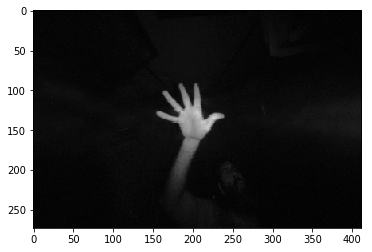

In [13]:
import multiprocessing
from multiprocessing.dummy import Pool as ThreadPool
from skimage import io, transform

plt.imshow(io.imread(data_img["img_path"].loc[2]), cmap=cm.gray) # image resized
plt.show()

We would better train two NN: 
- 1 tracking_hand_NN: to identify the region of the picture where the hand is
- 2 gesture_classifier: the actual classification model

### Hand trancking CNN

We will only need a portion of the dataset. 100 images should be enough. 

In [15]:
d = data_img.sample(200, random_state=0)
d.describe()

,img_path,subject,serie,gesture,try
count,200,200,200,200,200
unique,200,15,3,20,174
top,../input/multimodhandgestrec/MultiModHandGestR...,08,train_pose,08_palm_m,00
freq,1,24,130,30,8


In [ ]:
def importpicture(path):
    try: 
        img = io.imread(path)
        img = transform.resize(img, (412,273), mode="constant") # we need consitant images shapes
        return(img)
    except:
        print(name + "    Error")
        return(None)

pool = ThreadPool(multiprocessing.cpu_count())

X = pool.map(importpicture, data_img["img_path"])
X = np.concatenate(X, axis=0)


/home/david/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [6]:
print(X[0].shape)

(273, 412)


In [7]:
Y = pd.get_dummies(data_img["gesture"], columns=["gesture"]).values

In [21]:
#X = X.reshape(X.shape[0],416,275)

print(X.shape, Y.shape)

(65813,) (65813, 20)


In [4]:
import tensorflow as tf


In [14]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 416, 275, 1])

    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=10)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss,global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {"accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


In [15]:
# Create the Estimator
gesture_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_protocol': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa2f439cb38>, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_model_dir': '/tmp/mnist_convnet_model', '_eval_distribute': None, '_device_fn': None, '_save_checkpoints_steps': None, '_train_distribute': None, '_master': '', '_global_id_in_cluster': 0, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_service': None, '_evaluation_master': '', '_tf_random_seed': None, '_is_chief': True, '_save_checkpoints_secs': 600, '_experimental_distribute': None}


In [16]:
# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)


In [18]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X},
    y=Y,
    batch_size=100,
    num_epochs=None,
    shuffle=True)
gesture_classifier.train(
    input_fn=train_input_fn,
    steps=20000,
    hooks=[logging_hook])


INFO:tensorflow:Calling model_fn.


ValueError: Dimension size must be evenly divisible by 114400 but is 100 for 'Reshape' (op: 'Reshape') with input shapes: [100], [4] and with input tensors computed as partial shapes: input[1] = [?,416,275,1].